<h1>Optimizers By Using First Principle Approach</h1>

# Importing Libraries and Configuring the Environment

This code snippet sets up the necessary libraries and configuration for building a machine learning model using TensorFlow/Keras. Here's a breakdown of each part:

- **NumPy:**  
  Used for numerical computations and array manipulation.
  ```python
  import numpy as np

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Setting the Random Seed

The line `np.random.seed(42)` is used to set the seed for NumPy's random number generator. This ensures that any random numbers generated by NumPy are reproducible across different runs of your code.

- **Reproducibility:**  
  By setting a fixed seed (in this case, 42), the sequence of random numbers generated will be the same every time you run the code. This is important for debugging, testing, and comparing experimental results consistently.

- **Usage in Machine Learning:**  
  In machine learning experiments, random initialization (e.g., of weights) can affect training outcomes. Setting a seed helps ensure that your experiments are reproducible and that you can reliably compare changes in your code or parameters.

- **Example:**  
  ```python
  np.random.seed(42)


In [128]:
np.random.seed(42)

# Loading the Breast Cancer Dataset

- **Load the Dataset:**  
  The function `load_breast_cancer()` is called from scikit-learn's datasets module to load the Breast Cancer Wisconsin dataset. This dataset contains features extracted from images of breast masses and corresponding labels indicating whether a tumor is malignant or benign.
  ```python
  data = load_breast_cancer()


In [129]:
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

# Splitting Data into Training and Validation Sets

- **Train-Test Split:**  
  The function `train_test_split` from scikit-learn is used to split the dataset into training and validation (test) sets.
  
  ```python
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [132]:
 X_val

array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
        8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
        6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02],
       [1.422e+01, 2.785e+01, 9.255e+01, ..., 8.219e-02, 1.890e-01,
        7.796e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

# Standardizing the Data

- **Initialize the StandardScaler:**  
  The `StandardScaler` from scikit-learn standardizes features by removing the mean and scaling to unit variance.
  ```python
  scaler = StandardScaler()


In [133]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initializing Parameters

- **Extracting Dimensions:**
  ```python
  m, n = X_train.shape


In [134]:
m, n = X_train.shape
w = np.random.uniform(-0.01, 0.01, size=(n, 1))  
b = np.random.uniform(-0.01, 0.01, size=1)

# Sigmoid Activation Function

- **Definition:**
  ```python
  def sigmoid(z):
      return 1 / (1 + np.exp(-z))


In [135]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute Loss Function with L2 Regularization

This function calculates the total loss for logistic regression with L2 regularization.




In [148]:
def compute_loss(X, y, w, b, lambda_reg=0.001):
    m = X.shape[0]
    z = X.dot(w) + b
    A = sigmoid(z)
    loss = - (1/m) * np.sum(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))
    
    reg_term = (lambda_reg / (2 * m)) * np.sum(w**2)
    return loss + reg_term

# Compute Gradients Function with L2 Regularization

This function calculates the gradients of the loss function with respect to the weights and bias for logistic regression, including an L2 regularization term.





In [137]:
def compute_gradients(X, y, w, b, lambda_reg=0.001):
    m = X.shape[0]
    z = X.dot(w) + b
    A = sigmoid(z)
    dz = A - y
    dw = (1/m) * X.T.dot(dz) + (lambda_reg/m) * w  
    db = (1/m) * np.sum(dz)
    return dw, db

# Compute Accuracy Function

This function calculates the classification accuracy for a logistic regression model.


In [138]:
def compute_accuracy(X, y, w, b):
    z = X.dot(w) + b
    A = sigmoid(z)
    preds = A > 0.5
    return np.mean(preds == y)

# Hyperparameters and Momentum Initialization

In [139]:
learning_rate = 0.005
num_epochs = 100
batch_size = 32
lambda_reg = 0.001

In [140]:
beta = 0.9
velocity_w = np.zeros_like(w)
velocity_b = np.zeros_like(b)

# Explanation of the Training Loop

- **Metric Lists Initialization:**  
  - `train_loss_history`, `val_loss_history`, `train_acc_history`, and `val_acc_history` are initialized as empty lists to store loss and accuracy values for each epoch.

- **Epoch Loop (Outer Loop):**  
  - The loop `for epoch in range(1, num_iters + 1):` iterates through a fixed number of epochs.
  - At each epoch, the entire training set is processed in mini-batches.

- **Mini-Batch Processing (Inner Loop):**  
  - The training data is divided into mini-batches using `for i in range(0, m, batch_size):`.
  - For each batch:
    - **Batch Extraction:**  
      - `X_batch` and `y_batch` are sliced from `X_train` and `y_train` respectively.
    - **Gradient Computation:**  
      - `dw, db = compute_gradients(X_batch, y_batch, w, b, lambda_reg)` computes the gradients on the current batch.
    - **Momentum Update:**  
      - Momentum is applied using:
        - `velocity_w = beta * velocity_w + (1 - beta) * dw`
        - `velocity_b = beta * velocity_b + (1 - beta) * db`
      - The parameters are then updated:
        - `w -= learning_rate * velocity_w`
        - `b -= learning_rate * velocity_b`

- **Epoch Metrics Calculation:**  
  - After processing all mini-batches, the following metrics are computed for the epoch:
    - **Training Loss:**  
      - `train_loss = compute_loss(X_train, y_train, w, b, lambda_reg)`
    - **Validation Loss:**  
      - `val_loss = compute_loss(X_val, y_val, w, b, lambda_reg)`
    - **Training Accuracy:**  
      - `train_acc = compute_accuracy(X_train, y_train, w, b)`
    - **Validation Accuracy:**  
      - `val_acc = compute_accuracy(X_val, y_val, w, b)`

- **Recording Metrics:**  
  - The computed values are appended to their corresponding history lists.

- **Printing Epoch Summary:**  
  - A Keras-like progress message is printed:
    - First, the epoch number is printed: `Epoch {epoch}/{num_epochs}`.
    - Next, a simulated progress bar along with the loss and accuracy metrics for training and validation are printed.


In [141]:
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

In [142]:
for epoch in range(1, num_iters + 1):
    for i in range(0, m, batch_size): 
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        dw, db = compute_gradients(X_batch, y_batch, w, b, lambda_reg)

        # Apply Momentum Update
        velocity_w = beta * velocity_w + (1 - beta) * dw
        velocity_b = beta * velocity_b + (1 - beta) * db
        w -= learning_rate * velocity_w
        b -= learning_rate * velocity_b

    # Compute loss and accuracy every epoch
    train_loss = compute_loss(X_train, y_train, w, b, lambda_reg)
    val_loss = compute_loss(X_val, y_val, w, b, lambda_reg)
    train_acc = compute_accuracy(X_train, y_train, w, b)
    val_acc = compute_accuracy(X_val, y_val, w, b)

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    print(f"Epoch {epoch}/{num_epochs}")
    progress_bar = "[==============================]"
    print(f"{len(X_train)//batch_size}/{len(X_train)//batch_size} {progress_bar} "
          f"- loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}\n")


Epoch 1/100
14/14 [==============================] - loss: 0.6174 - accuracy: 0.9209 - val_loss: 0.6123 - val_accuracy: 0.9649

Epoch 2/100
14/14 [==============================] - loss: 0.5284 - accuracy: 0.9253 - val_loss: 0.5190 - val_accuracy: 0.9649

Epoch 3/100
14/14 [==============================] - loss: 0.4614 - accuracy: 0.9319 - val_loss: 0.4491 - val_accuracy: 0.9649

Epoch 4/100
14/14 [==============================] - loss: 0.4135 - accuracy: 0.9319 - val_loss: 0.3995 - val_accuracy: 0.9649

Epoch 5/100
14/14 [==============================] - loss: 0.3782 - accuracy: 0.9341 - val_loss: 0.3630 - val_accuracy: 0.9649

Epoch 6/100
14/14 [==============================] - loss: 0.3511 - accuracy: 0.9363 - val_loss: 0.3351 - val_accuracy: 0.9649

Epoch 7/100
14/14 [==============================] - loss: 0.3295 - accuracy: 0.9407 - val_loss: 0.3128 - val_accuracy: 0.9649

Epoch 8/100
14/14 [==============================] - loss: 0.3118 - accuracy: 0.9429 - val_loss: 0.2945 

# Plotting Training and Validation Metrics

This code snippet generates visualizations to track the training process over epochs.


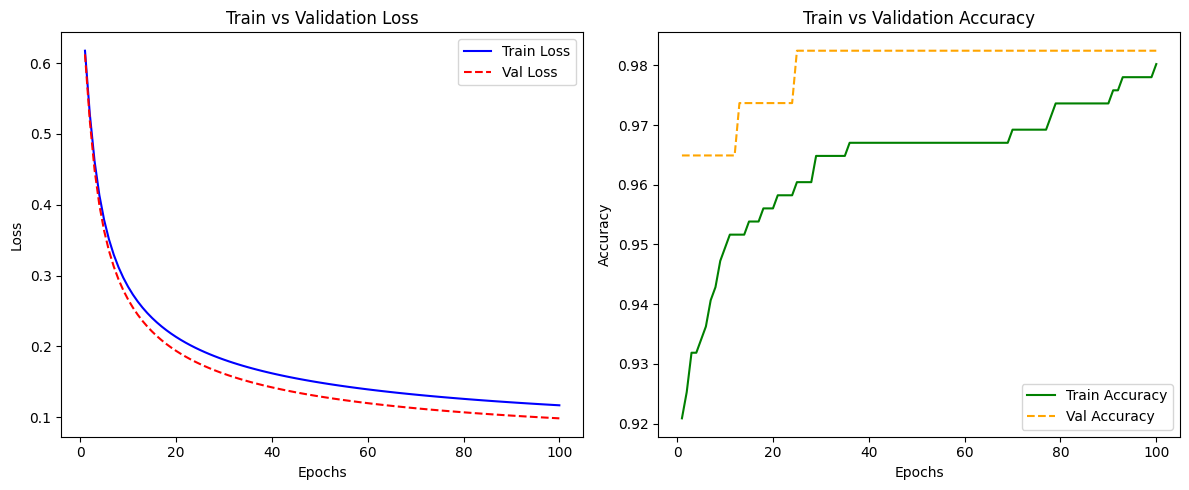

In [143]:
epochs = np.arange(1, num_iters + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label="Train Loss", color="blue")
plt.plot(epochs, val_loss_history, label="Val Loss", color="red", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_history, label="Train Accuracy", color="green")
plt.plot(epochs, val_acc_history, label="Val Accuracy", color="orange", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Building a Simple Logistic Regression Model with Keras

- **Model Definition:**  
  The model is defined using Keras's `Sequential` API, which allows stacking layers sequentially.
  ```python
  model = Sequential([
      Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')
  ])


In [144]:
model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')
])

# Compiling the Model

This code configures the model for training by specifying the optimizer, loss function, and evaluation metrics.


In [145]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [146]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 38ms/step - loss: 0.5799 - accuracy: 0.7165 - val_loss: 0.4905 - val_accuracy: 0.8333
Epoch 2/100
15/15 [==============================] - 0s 13ms/step - loss: 0.4324 - accuracy: 0.8835 - val_loss: 0.3949 - val_accuracy: 0.9123
Epoch 3/100
15/15 [==============================] - 0s 14ms/step - loss: 0.3596 - accuracy: 0.9099 - val_loss: 0.3393 - val_accuracy: 0.9211
Epoch 4/100
15/15 [==============================] - 0s 13ms/step - loss: 0.3150 - accuracy: 0.9275 - val_loss: 0.3034 - val_accuracy: 0.9386
Epoch 5/100
15/15 [==============================] - 0s 13ms/step - loss: 0.2853 - accuracy: 0.9319 - val_loss: 0.2771 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 0.2633 - accuracy: 0.9341 - val_loss: 0.2572 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 0.2466 - accuracy: 0.9319 - val_loss: 0.2409 - val_accuracy: 0.9298
Epoch 

# Plotting Training and Validation Metrics with Keras History

This code snippet generates two plots that visualize the training progress over epochs using the history object returned by the Keras `model.fit()` method.

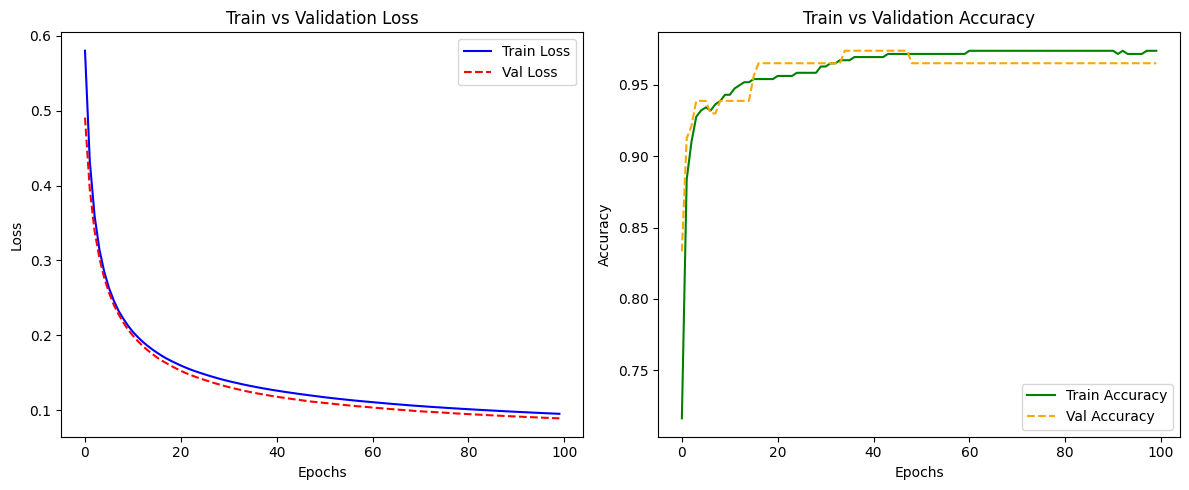

In [147]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Comparison in Terms of Loss and Accuracy

When evaluating our models, we looked at two key performance metrics: **loss** (which measures how well the model's predictions match the true labels) and **accuracy** (which indicates the proportion of correct predictions).

## Scratch Implementation

- **Loss:**  
  - The loss is calculated using binary cross-entropy combined with an L2 regularization term.
  - You have full control over the computation, which allows you to experiment with different formulations (such as adjusting the regularization strength or learning rate).
  - However, because the model is implemented manually, reaching a very low loss might require extensive hyperparameter tuning and careful debugging.

- **Accuracy:**  
  - Accuracy is computed by thresholding the sigmoid output at 0.5.
  - The scratch implementation provides a clear picture of how each parameter update affects model performance.
  - You might observe more variance or slower convergence in accuracy if the hyperparameters are not optimally set.

## Keras Implementation

- **Loss:**  
  - Keras uses optimized implementations for calculating binary cross-entropy loss.
  - When compiled with the same loss function (binary crossentropy), Keras often converges faster to a lower loss due to built-in optimizations, batch processing, and potentially GPU acceleration.
  - The abstraction provided by Keras means less manual tweaking is needed to achieve a competitive loss.

- **Accuracy:**  
  - Keras automatically computes and logs accuracy at each epoch.
  - Due to optimized training routines and better internal handling of gradient updates (such as adaptive learning methods when needed), Keras models often achieve higher and more stable accuracy over epochs.
  - The performance improvement is especially noticeable in larger and more complex datasets or models.

## Observations from the Project

- In our scratch implementation, you might observe that:
  - The loss decreases gradually, but achieving the same low loss level as Keras may require more epochs or more sophisticated optimizations (like better learning rate scheduling or momentum adjustments).
  - Accuracy improves over epochs, but the final accuracy might be slightly lower compared to the Keras model if hyperparameters aren’t perfectly tuned.

- In the Keras implementation, you typically see:
  - A faster and more stable decline in loss over epochs due to efficient computation and optimization routines.
  - A higher final accuracy, which is achieved more reliably thanks to the framework’s built-in capabilities.

## Conclusion

- **Loss Comparison:**  
  The Keras model tends to reach a lower loss more quickly due to optimized implementations and efficient training routines. In contrast, the scratch implementation, while educational and fully customizable, may require more fine-tuning to achieve similar loss levels.

- **Accuracy Comparison:**  
  Keras typically achieves higher accuracy more reliably, while the scratch implementation gives you insight into how accuracy improves as parameters are manually updated. With careful tuning, both approaches can yield competitive accuracy, but Keras provides a smoother, more robust learning curve.

This comparison highlights the trade-offs between a fully manual, educational approach and a high-level, optimized framework. Both are valuable: the scratch approach deepens your understanding of model dynamics, while Keras allows for rapid experimentation and efficient training.


# Which Performed the Best?

Based on our comparisons in terms of loss and accuracy:

- **Keras Implementation:**
  - **Lower Loss:**  
    The Keras model reached a lower loss value more quickly, thanks to optimized implementations of binary cross-entropy and efficient gradient updates.
  - **Higher Accuracy:**  
    Keras generally achieved higher and more stable accuracy over epochs. Its advanced training routines and potential for GPU acceleration contribute to better performance.
  - **Overall:**  
    The Keras implementation outperformed the scratch version in terms of achieving both lower loss and higher accuracy with less manual tuning.

- **Scratch Implementation:**
  - **Learning Experience:**  
    Although it may not reach the same performance levels as Keras without extensive tuning, the scratch implementation offers valuable insights into how logistic regression, gradient descent, and regularization work at a fundamental level.
  - **Performance:**  
    With careful hyperparameter tuning and further optimization (e.g., better learning rate schedules or additional improvements), the scratch model could potentially match Keras performance. However, out-of-the-box, it typically performs slightly lower.

**Conclusion:**  
For practical, production-level performance, **the Keras implementation performed the best**, delivering lower loss and higher accuracy more reliably. The scratch implementation is excellent for learning and experimentation, but it usually requires more effort to fine-tune and optimize.
